In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import defaultdict

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
graph_df = pd.read_csv('/content/drive/MyDrive/DataMining/graph.csv')
content_df = pd.read_csv('/content/drive/MyDrive/DataMining/content.csv')


In [11]:
graph_df

,Source,Target
0,https://learnpython.com/introduction,https://learnpython.com/basics
1,https://learnpython.com/introduction,https://datasciencehub.com/overview
2,https://learnpython.com/basics,https://datasciencehub.com/statistics
3,https://aiworld.com/artificial-intelligence,https://aiworld.com/machine-learning
4,https://aiworld.com/machine-learning,https://datasciencehub.com/tools
5,https://datasciencehub.com/overview,https://datasciencehub.com/tools
6,https://datasciencehub.com/tools,https://datasciencehub.com/statistics
7,https://datasciencehub.com/big-data,https://datasciencehub.com/deep-learning
8,https://datasciencehub.com/big-data,https://datasciencehub.com/time-series-analysis
9,https://datasciencehub.com/deep-learning,https://aiworld.com/natural-language-processing


In [12]:
content_df

,URL,Title,Content
0,https://learnpython.com/introduction,Introduction to Python,Python is a versatile programming language use...
1,https://learnpython.com/basics,Python Basics,"The basics of Python include variables, loops,..."
2,https://aiworld.com/artificial-intelligence,What is Artificial Intelligence?,Artificial Intelligence (AI) refers to the sim...
3,https://aiworld.com/machine-learning,Understanding Machine Learning,Machine Learning (ML) is a subset of AI that e...
4,https://datasciencehub.com/overview,What is Data Science?,"Data Science combines statistics, programming,..."
5,https://datasciencehub.com/tools,Top Data Science Tools,Popular tools in data science include Jupyter ...
6,https://webdevworld.com/html-css,HTML and CSS Basics,HTML (HyperText Markup Language) is the standa...
7,https://webdevworld.com/javascript,Introduction to JavaScript,JavaScript is a programming language used to a...
8,https://blockchaininsights.com/technology,Understanding Blockchain Technology,Blockchain is a decentralized ledger technolog...
9,https://blockchaininsights.com/cryptocurrencies,Cryptocurrencies Explained,Cryptocurrencies are digital currencies built ...


In [16]:
web_graph = nx.DiGraph()
for _, row in graph_df.iterrows():
    web_graph.add_edge(row["Source"], row["Target"])

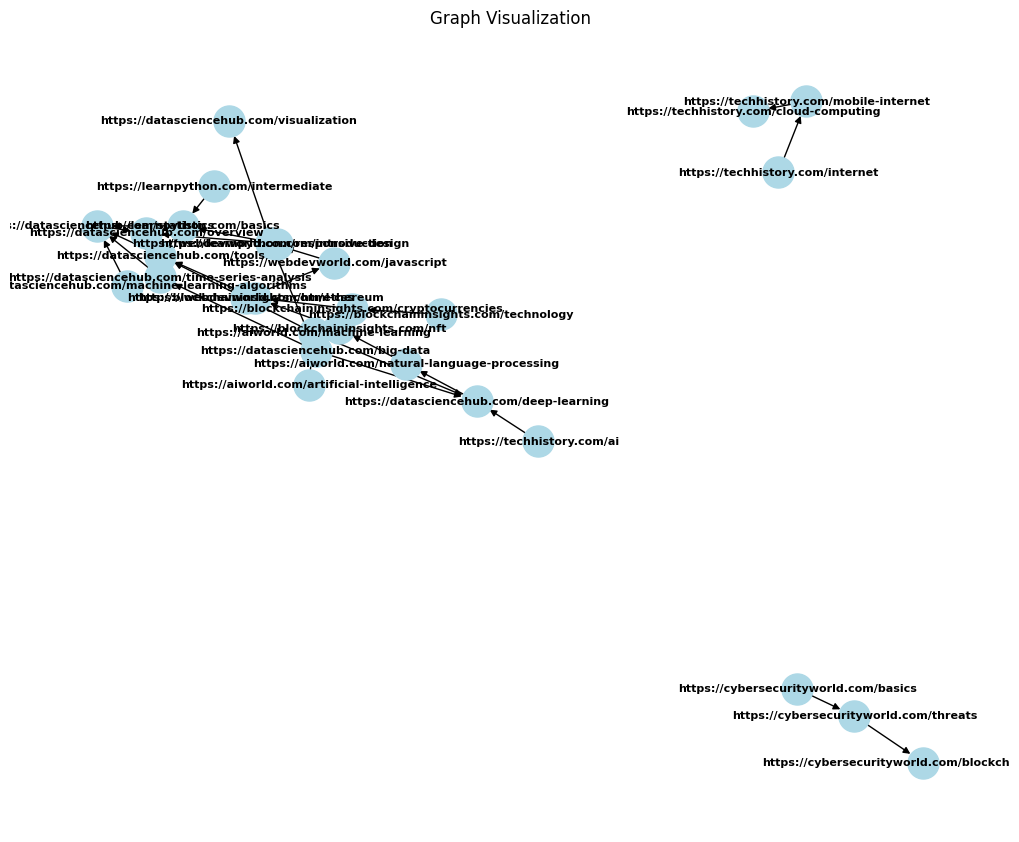

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
nx.draw(web_graph, with_labels=True, node_size=500, node_color='lightblue', font_size=8,font_color="black", font_weight='bold')
plt.title('Graph Visualization')
plt.show()

In [61]:
# Load the content file into a dictionary
web_content = dict(zip(content_df["URL"], content_df["Content"]))
print("Nodes:", web_graph.nodes())
print("Edges:", web_graph.edges())
print("\nURL Content:")
for site, content in web_content.items():
    print(f"{site}: {content}")


Nodes: ['https://learnpython.com/introduction', 'https://learnpython.com/basics', 'https://datasciencehub.com/overview', 'https://datasciencehub.com/statistics', 'https://aiworld.com/artificial-intelligence', 'https://aiworld.com/machine-learning', 'https://datasciencehub.com/tools', 'https://datasciencehub.com/big-data', 'https://datasciencehub.com/deep-learning', 'https://datasciencehub.com/time-series-analysis', 'https://aiworld.com/natural-language-processing', 'https://blockchaininsights.com/nft', 'https://blockchaininsights.com/technology', 'https://blockchaininsights.com/cryptocurrencies', 'https://blockchaininsights.com/ethereum', 'https://cybersecurityworld.com/basics', 'https://cybersecurityworld.com/threats', 'https://cybersecurityworld.com/blockchain-security', 'https://datasciencehub.com/machine-learning-algorithms', 'https://techhistory.com/internet', 'https://techhistory.com/mobile-internet', 'https://techhistory.com/cloud-computing', 'https://techhistory.com/ai', 'https

In [62]:

def inverted_index(web_content):
    inverted_index = {}
    for website, content in web_content.items():
        words = content.lower().split()
        for word in words:
            if word not in inverted_index:
                inverted_index[word] = []
            inverted_index[word].append(website)
    return inverted_index


In [63]:
index = inverted_index(web_content)
print("\nInverted Index:")
for word, websites in index.items():
    print(f"{word}: {websites}")


Inverted Index:
python: ['https://learnpython.com/introduction', 'https://learnpython.com/introduction', 'https://learnpython.com/basics', 'https://learnpython.com/basics', 'https://datasciencehub.com/tools']
is: ['https://learnpython.com/introduction', 'https://learnpython.com/introduction', 'https://learnpython.com/basics', 'https://aiworld.com/machine-learning', 'https://datasciencehub.com/overview', 'https://webdevworld.com/html-css', 'https://webdevworld.com/html-css', 'https://webdevworld.com/javascript', 'https://blockchaininsights.com/technology']
a: ['https://learnpython.com/introduction', 'https://aiworld.com/machine-learning', 'https://webdevworld.com/javascript', 'https://blockchaininsights.com/technology', 'https://techhistory.com/internet', 'https://techhistory.com/internet']
versatile: ['https://learnpython.com/introduction']
programming: ['https://learnpython.com/introduction', 'https://webdevworld.com/javascript']
language: ['https://learnpython.com/introduction', 'ht

In [54]:
pagerank_scores = nx.pagerank(web_graph, alpha=0.85, max_iter=100, tol=1e-6)
print("\nPageRank Scores:", pagerank_scores)


PageRank Scores: {'https://learnpython.com/introduction': 0.006865794739342251, 'https://learnpython.com/basics': 0.015619683032003624, 'https://datasciencehub.com/overview': 0.2013730885702701, 'https://datasciencehub.com/statistics': 0.21757646928178512, 'https://aiworld.com/artificial-intelligence': 0.006865794739342251, 'https://aiworld.com/machine-learning': 0.012701720267783167, 'https://datasciencehub.com/tools': 0.2202561637888331, 'https://datasciencehub.com/big-data': 0.014372253950299382, 'https://datasciencehub.com/deep-learning': 0.02420815931046826, 'https://datasciencehub.com/time-series-analysis': 0.012974002668219492, 'https://aiworld.com/natural-language-processing': 0.027442730153240287, 'https://blockchaininsights.com/nft': 0.030192115369596526, 'https://blockchaininsights.com/technology': 0.006865794739342251, 'https://blockchaininsights.com/cryptocurrencies': 0.012701720267783167, 'https://blockchaininsights.com/ethereum': 0.04332555503111504, 'https://cybersecur

In [56]:
def search_engine(query, index, scores):
    query_terms = query.lower().split()
    results = set()
    for term in query_terms:
        if term in index:
            if not results:
                results = set(index[term])
            else:
                results = results.intersection(index[term])
    # Sort results based on score
    ranked_results = []
    for website in results:
        if website in scores:
          ranked_results.append((website, scores[website]))
    ranked_results.sort(key=lambda x: x[1], reverse=True)

    return ranked_results

In [67]:
# Query and display results
query = "data"
print(f"\nSearch Results for '{query}' using PageRank:")
results = search_engine(query, index, pagerank_scores)

for page, score in results:
    print(f"{page}: {web_content[page]} ({score})")




Search Results for 'data' using PageRank:
https://datasciencehub.com/tools: Popular tools in data science include Jupyter Notebooks, R, and Tableau. Python libraries like Pandas, Matplotlib, and Seaborn are essential for data manipulation and visualization. Cloud platforms like AWS and Google Cloud are often used for big data analysis. (0.2202561637888331)
https://datasciencehub.com/overview: Data Science combines statistics, programming, and domain expertise to analyze and extract insights from data. Key skills for data scientists include data visualization, SQL, and machine learning. It is widely used in business analytics, research, and decision-making. (0.2013730885702701)
https://learnpython.com/introduction: Python is a versatile programming language used in web development, data science, AI, and more. It is known for its simple syntax and powerful libraries such as NumPy, Pandas, and TensorFlow. Many developers prefer Python for its community support and ease of learning. (0.00